In [1]:
api = 'f9)35x5j1`m6kE230i!957336Xj2N380'
secret = '7a3^F85Z771Q55r3#273111Mv88A4=6_'
session = '46458056'

import time

In [2]:
from breeze_connect import BreezeConnect

# Initialize SDK
breeze = BreezeConnect(api_key=api)

import urllib
print("https://api.icicidirect.com/apiuser/login?api_key="+urllib.parse.quote_plus("your_api_key"))

# Generate Session
breeze.generate_session(api_secret=secret,
                        session_token=session)
print(breeze.get_funds())

https://api.icicidirect.com/apiuser/login?api_key=your_api_key
{'Success': {'bank_account': '52410197560', 'total_bank_balance': 0.0, 'allocated_equity': 0.0, 'allocated_fno': 0.0, 'allocated_commodity': 0.0, 'allocated_currency': 0.0, 'block_by_trade_equity': 0.0, 'block_by_trade_fno': 0.0, 'block_by_trade_commodity': 0.0, 'block_by_trade_currency': 0.0, 'block_by_trade_balance': 0.0, 'unallocated_balance': '0'}, 'Status': 200, 'Error': None}


# Importing the nessecary libraries

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import warnings 
warnings.filterwarnings('ignore')

In [4]:
start = dt.datetime(2023,12,29)
expiry = dt.datetime(2024,1,26)
tick2 = '^NSEI'
vix = pd.read_csv('IVIX-JAN.csv')
nifty = yf.download(tick2,start,expiry)

[*********************100%%**********************]  1 of 1 completed


In [5]:
nifty = nifty['Adj Close']

In [6]:
nifty

Date
2023-12-29    21731.400391
2024-01-01    21741.900391
2024-01-02    21665.800781
2024-01-03    21517.349609
2024-01-04    21658.599609
2024-01-05    21710.800781
2024-01-08    21513.000000
2024-01-09    21544.849609
2024-01-10    21618.699219
2024-01-11    21647.199219
2024-01-12    21894.550781
2024-01-15    22097.449219
2024-01-16    22032.300781
2024-01-17    21571.949219
2024-01-18    21462.250000
2024-01-19    21622.400391
2024-01-23    21238.800781
2024-01-24    21453.949219
2024-01-25    21352.599609
Name: Adj Close, dtype: float64

# Fixing VIX data

In [7]:
new_value = (nifty.iloc[-4] + nifty.iloc[-3]) / 2

new_date = pd.to_datetime('2024-01-20')
new_row = pd.Series([new_value], index=[new_date])

nifty = nifty.append(new_row)

nifty = nifty.sort_index()
print(nifty)

2023-12-29    21731.400391
2024-01-01    21741.900391
2024-01-02    21665.800781
2024-01-03    21517.349609
2024-01-04    21658.599609
2024-01-05    21710.800781
2024-01-08    21513.000000
2024-01-09    21544.849609
2024-01-10    21618.699219
2024-01-11    21647.199219
2024-01-12    21894.550781
2024-01-15    22097.449219
2024-01-16    22032.300781
2024-01-17    21571.949219
2024-01-18    21462.250000
2024-01-19    21622.400391
2024-01-20    21430.600586
2024-01-23    21238.800781
2024-01-24    21453.949219
2024-01-25    21352.599609
dtype: float64


In [8]:
len(nifty) == len(vix)

True

In [9]:
nifty = pd.DataFrame(nifty,index = nifty.index)

In [10]:
nifty['vix'] = np.nan
for i in range(len(nifty)):
    nifty['vix'].iloc[i] = vix['Price'].iloc[-(i+1)]

In [11]:
nifty.rename(columns = {0:'nifty'},inplace = True)

In [12]:
nifty

,nifty,vix
2023-12-29,21731.400391,14.5025
2024-01-01,21741.900391,14.6800
2024-01-02,21665.800781,14.5800
2024-01-03,21517.349609,14.0975
2024-01-04,21658.599609,13.3300
2024-01-05,21710.800781,12.6300
2024-01-08,21513.000000,13.4625
2024-01-09,21544.849609,13.2625
2024-01-10,21618.699219,12.9700
2024-01-11,21647.199219,12.7675


In [13]:
nifty['vix'].iloc[0]

14.5025

In [14]:
move = (nifty['vix'].iloc[0])/(12**(1/2))
move

4.186511139461274

# Nifty range for a month

In [15]:
strike_up = nifty['nifty'].iloc[0] + ((move/100)*nifty['nifty'].iloc[0])
strike_down = nifty['nifty'].iloc[0] - ((move/100)*nifty['nifty'].iloc[0])

In [16]:
nifty

,nifty,vix
2023-12-29,21731.400391,14.5025
2024-01-01,21741.900391,14.6800
2024-01-02,21665.800781,14.5800
2024-01-03,21517.349609,14.0975
2024-01-04,21658.599609,13.3300
2024-01-05,21710.800781,12.6300
2024-01-08,21513.000000,13.4625
2024-01-09,21544.849609,13.2625
2024-01-10,21618.699219,12.9700
2024-01-11,21647.199219,12.7675


# Importing options data

Here we use ICICI Breeze for importing options data for January month
We do it for some particular strikes which we need to specify
And rest are the strikes that we would trade

In [17]:
month = input('enter the month')
a = int(np.round(strike_up,-2))
b = int(np.round(strike_down,-2))
strikes = [a,a+200,b,b-200]

to_expiry = "2024-01-25"
To = []
Type = ['call','put']
data = {}
for i in strikes:
    for j in Type:
        key = f'{month}_{i}_{j}'
        data[key] = breeze.get_historical_data(interval="1day",
                            from_date = "2023-12-29",
                            to_date= to_expiry,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date= to_expiry,
                            right=str(j),
                            strike_price= str(i))

enter the monthjan


In [18]:
data.keys()

dict_keys(['jan_22600_call', 'jan_22600_put', 'jan_22800_call', 'jan_22800_put', 'jan_20800_call', 'jan_20800_put', 'jan_20600_call', 'jan_20600_put'])

In [19]:
data

{'jan_22600_call': {'Success': [{'datetime': '2023-12-29 15:29:57',
    'stock_code': 'NIFTY',
    'exchange_code': 'NFO',
    'product_type': 'Options',
    'expiry_date': '25-JAN-24',
    'right': 'Call',
    'strike_price': '22600',
    'open': '99.95',
    'high': '99.95',
    'low': '63',
    'close': '99.6',
    'volume': '463550',
    'open_interest': None,
    'count': 0},
   {'datetime': '2024-01-01 15:29:50',
    'stock_code': 'NIFTY',
    'exchange_code': 'NFO',
    'product_type': 'Options',
    'expiry_date': '25-JAN-24',
    'right': 'Call',
    'strike_price': '22600',
    'open': '65.15',
    'high': '92.7',
    'low': '54.45',
    'close': '72.65',
    'volume': '664000',
    'open_interest': None,
    'count': 1},
   {'datetime': '2024-01-02 15:29:59',
    'stock_code': 'NIFTY',
    'exchange_code': 'NFO',
    'product_type': 'Options',
    'expiry_date': '25-JAN-24',
    'right': 'Call',
    'strike_price': '22600',
    'open': '64.85',
    'high': '64.85',
    'low'

In [20]:
strikes

[22600, 22800, 20800, 20600]

# Forming the dataframe

In [21]:
df = pd.DataFrame()
for i in data.keys():
    if 'call' in i:
        a = pd.DataFrame(data[i]['Success'])
        df[i] = pd.DataFrame(a['close'])
    else:
        b = pd.DataFrame(data[i]['Success'])
        df[i] = pd.DataFrame(b['close'])

In [22]:
start = 'jan_22600_call'
date_list = []
for i in range(len(df)):
    index = pd.to_datetime(data[start]['Success'][i]['datetime']).date()
    date_list.append(index)
date_list

[datetime.date(2023, 12, 29),
 datetime.date(2024, 1, 1),
 datetime.date(2024, 1, 2),
 datetime.date(2024, 1, 3),
 datetime.date(2024, 1, 4),
 datetime.date(2024, 1, 5),
 datetime.date(2024, 1, 8),
 datetime.date(2024, 1, 9),
 datetime.date(2024, 1, 10),
 datetime.date(2024, 1, 11),
 datetime.date(2024, 1, 12),
 datetime.date(2024, 1, 15),
 datetime.date(2024, 1, 16),
 datetime.date(2024, 1, 17),
 datetime.date(2024, 1, 18),
 datetime.date(2024, 1, 19),
 datetime.date(2024, 1, 20),
 datetime.date(2024, 1, 23),
 datetime.date(2024, 1, 24)]

In [23]:
df.index = date_list
df

,jan_22600_call,jan_22600_put,jan_22800_call,jan_22800_put,jan_20800_call,jan_20800_put,jan_20600_call,jan_20600_put
2023-12-29,99.6,748.45,61.8,909.4,1202.8,67.1,1383,50.65
2024-01-01,72.65,767.65,44.2,926.05,1145.1,58,1313.35,42.2
2024-01-02,69.7,751.3,40.5,915.9,1140.9,50.55,1369.8,36.85
2024-01-03,41.3,894.2,23.85,1120,994.2,54.2,1180.55,37.45
2024-01-04,21.2,1022.95,12.1,1205.8,858.85,61.5,1028.05,40.65
2024-01-05,26.25,855.9,15,1055,1018.15,32.15,1197.75,21.75
2024-01-08,18.25,807.95,9.95,1005.6,1018.15,26.05,1125,17.45
2024-01-09,11.9,1028.65,7.85,1230.8,812.25,42.35,1014.85,28.2
2024-01-10,10.5,994.15,7.4,1179.4,847.75,33.6,1035.9,21.6
2024-01-11,12.15,898.2,7.6,1095.35,928,21.45,1117.1,14.1


In [24]:
nifty.drop(nifty.tail(1).index,inplace = True)

In [25]:
len(nifty) == len(df)

True

In [26]:
nifty

,nifty,vix
2023-12-29,21731.400391,14.5025
2024-01-01,21741.900391,14.6800
2024-01-02,21665.800781,14.5800
2024-01-03,21517.349609,14.0975
2024-01-04,21658.599609,13.3300
2024-01-05,21710.800781,12.6300
2024-01-08,21513.000000,13.4625
2024-01-09,21544.849609,13.2625
2024-01-10,21618.699219,12.9700
2024-01-11,21647.199219,12.7675


In [27]:
# New Setup Example with 200 Points Difference:
# Sell 20,800 Put
# Buy 20,600 Put
# Sell 22,600 Call
# Buy 22,800 Call

In [28]:
merged_df = pd.concat([nifty, df], axis=1)

In [29]:
merged_df

,nifty,vix,jan_22600_call,jan_22600_put,jan_22800_call,jan_22800_put,jan_20800_call,jan_20800_put,jan_20600_call,jan_20600_put
2023-12-29 00:00:00,21731.400391,14.5025,99.6,748.45,61.8,909.4,1202.8,67.1,1383,50.65
2024-01-01 00:00:00,21741.900391,14.6800,72.65,767.65,44.2,926.05,1145.1,58,1313.35,42.2
2024-01-02 00:00:00,21665.800781,14.5800,69.7,751.3,40.5,915.9,1140.9,50.55,1369.8,36.85
2024-01-03 00:00:00,21517.349609,14.0975,41.3,894.2,23.85,1120,994.2,54.2,1180.55,37.45
2024-01-04 00:00:00,21658.599609,13.3300,21.2,1022.95,12.1,1205.8,858.85,61.5,1028.05,40.65
2024-01-05 00:00:00,21710.800781,12.6300,26.25,855.9,15,1055,1018.15,32.15,1197.75,21.75
2024-01-08 00:00:00,21513.000000,13.4625,18.25,807.95,9.95,1005.6,1018.15,26.05,1125,17.45
2024-01-09 00:00:00,21544.849609,13.2625,11.9,1028.65,7.85,1230.8,812.25,42.35,1014.85,28.2
2024-01-10 00:00:00,21618.699219,12.9700,10.5,994.15,7.4,1179.4,847.75,33.6,1035.9,21.6
2024-01-11 00:00:00,21647.199219,12.7675,12.15,898.2,7.6,1095.35,928,21.45,1117.1,14.1


# Forming the positions column

In [30]:
for i in strikes:
    if i == int(np.round(strike_up,-2)):
        merged_df[f'{i}_position_call'] = -1
        
    elif i == int(np.round(strike_down,-2)):
        merged_df[f'{i}_position_put'] = -1
        
    elif i == int(np.round(strike_up,-2)) + 200:
        merged_df[f'{i}_position_call'] = 1
        
    elif i == int(np.round(strike_down,-2)) - 200:
        merged_df[f'{i}_position_put'] = 1
    else:
        pass

In [31]:
merged_df.to_excel('india vix rough.xlsx')

In [32]:
# a = int(np.round(strike_up,-2))
# b = int(np.round(strike_down,-2))

# New Setup Example with 200 Points Difference:

# Sell 20,800 Put
# Buy 20,600 Put
# Sell 22,600 Call
# Buy 22,800 Call

In [33]:
merged_df = merged_df.apply(pd.to_numeric, errors='coerce')

# Merging all the columns into one dataframe

In [34]:
sold_strikes = ['jan_20800_put', 'jan_22600_call']
bought_strikes = ['jan_20600_put', 'jan_22800_call']

all_strikes = sold_strikes + bought_strikes

for strike in all_strikes:
    merged_df[f'{strike}_log_return'] = np.log(merged_df[strike] / merged_df[strike].shift(1))

print(merged_df.head())  

                   nifty      vix  jan_22600_call  jan_22600_put  \
2023-12-29  21731.400391  14.5025           99.60         748.45   
2024-01-01  21741.900391  14.6800           72.65         767.65   
2024-01-02  21665.800781  14.5800           69.70         751.30   
2024-01-03  21517.349609  14.0975           41.30         894.20   
2024-01-04  21658.599609  13.3300           21.20        1022.95   

            jan_22800_call  jan_22800_put  jan_20800_call  jan_20800_put  \
2023-12-29           61.80         909.40         1202.80          67.10   
2024-01-01           44.20         926.05         1145.10          58.00   
2024-01-02           40.50         915.90         1140.90          50.55   
2024-01-03           23.85        1120.00          994.20          54.20   
2024-01-04           12.10        1205.80          858.85          61.50   

            jan_20600_call  jan_20600_put  22600_position_call  \
2023-12-29         1383.00          50.65                   -1   
20

In [35]:
merged_df

,nifty,vix,jan_22600_call,jan_22600_put,jan_22800_call,jan_22800_put,jan_20800_call,jan_20800_put,jan_20600_call,jan_20600_put,22600_position_call,22800_position_call,20800_position_put,20600_position_put,jan_20800_put_log_return,jan_22600_call_log_return,jan_20600_put_log_return,jan_22800_call_log_return
2023-12-29,21731.400391,14.5025,99.60,748.45,61.80,909.40,1202.80,67.10,1383.00,50.65,-1,1,-1,1,NaN,NaN,NaN,NaN
2024-01-01,21741.900391,14.6800,72.65,767.65,44.20,926.05,1145.10,58.00,1313.35,42.20,-1,1,-1,1,-0.145741,-0.315509,-0.182519,-0.335179
2024-01-02,21665.800781,14.5800,69.70,751.30,40.50,915.90,1140.90,50.55,1369.80,36.85,-1,1,-1,1,-0.137480,-0.041453,-0.135565,-0.087423
2024-01-03,21517.349609,14.0975,41.30,894.20,23.85,1120.00,994.20,54.20,1180.55,37.45,-1,1,-1,1,0.069718,-0.523338,0.016151,-0.529518
2024-01-04,21658.599609,13.3300,21.20,1022.95,12.10,1205.80,858.85,61.50,1028.05,40.65,-1,1,-1,1,0.126356,-0.666861,0.081992,-0.678579
2024-01-05,21710.800781,12.6300,26.25,855.90,15.00,1055.00,1018.15,32.15,1197.75,21.75,-1,1,-1,1,-0.648625,0.213665,-0.625385,0.214845
2024-01-08,21513.000000,13.4625,18.25,807.95,9.95,1005.60,1018.15,26.05,1125.00,17.45,-1,1,-1,1,-0.210395,-0.363501,-0.220274,-0.410478
2024-01-09,21544.849609,13.2625,11.90,1028.65,7.85,1230.80,812.25,42.35,1014.85,28.20,-1,1,-1,1,0.485951,-0.427627,0.479982,-0.237059
2024-01-10,21618.699219,12.9700,10.50,994.15,7.40,1179.40,847.75,33.60,1035.90,21.60,-1,1,-1,1,-0.231442,-0.125163,-0.266629,-0.059034
2024-01-11,21647.199219,12.7675,12.15,898.20,7.60,1095.35,928.00,21.45,1117.10,14.10,-1,1,-1,1,-0.448801,0.145954,-0.426519,0.026668


# Calculating returns

In [36]:
position_columns = {
    'jan_20800_put': '20800_position_put',
    'jan_22600_call': '22600_position_call',
    'jan_20600_put': '20600_position_put',
    'jan_22800_call': '22800_position_call'
}

for strike in all_strikes:
    position_col = position_columns.get(strike)
    
    if position_col in merged_df.columns and f'{strike}_log_return' in merged_df.columns:
        merged_df[f'{strike}_s_returns'] = merged_df[position_col] * merged_df[f'{strike}_log_return']

print(merged_df.head())

                   nifty      vix  jan_22600_call  jan_22600_put  \
2023-12-29  21731.400391  14.5025           99.60         748.45   
2024-01-01  21741.900391  14.6800           72.65         767.65   
2024-01-02  21665.800781  14.5800           69.70         751.30   
2024-01-03  21517.349609  14.0975           41.30         894.20   
2024-01-04  21658.599609  13.3300           21.20        1022.95   

            jan_22800_call  jan_22800_put  jan_20800_call  jan_20800_put  \
2023-12-29           61.80         909.40         1202.80          67.10   
2024-01-01           44.20         926.05         1145.10          58.00   
2024-01-02           40.50         915.90         1140.90          50.55   
2024-01-03           23.85        1120.00          994.20          54.20   
2024-01-04           12.10        1205.80          858.85          61.50   

            jan_20600_call  jan_20600_put  ...  20800_position_put  \
2023-12-29         1383.00          50.65  ...                  

In [37]:
merged_df

,nifty,vix,jan_22600_call,jan_22600_put,jan_22800_call,jan_22800_put,jan_20800_call,jan_20800_put,jan_20600_call,jan_20600_put,...,20800_position_put,20600_position_put,jan_20800_put_log_return,jan_22600_call_log_return,jan_20600_put_log_return,jan_22800_call_log_return,jan_20800_put_s_returns,jan_22600_call_s_returns,jan_20600_put_s_returns,jan_22800_call_s_returns
2023-12-29,21731.400391,14.5025,99.60,748.45,61.80,909.40,1202.80,67.10,1383.00,50.65,...,-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01,21741.900391,14.6800,72.65,767.65,44.20,926.05,1145.10,58.00,1313.35,42.20,...,-1,1,-0.145741,-0.315509,-0.182519,-0.335179,0.145741,0.315509,-0.182519,-0.335179
2024-01-02,21665.800781,14.5800,69.70,751.30,40.50,915.90,1140.90,50.55,1369.80,36.85,...,-1,1,-0.137480,-0.041453,-0.135565,-0.087423,0.137480,0.041453,-0.135565,-0.087423
2024-01-03,21517.349609,14.0975,41.30,894.20,23.85,1120.00,994.20,54.20,1180.55,37.45,...,-1,1,0.069718,-0.523338,0.016151,-0.529518,-0.069718,0.523338,0.016151,-0.529518
2024-01-04,21658.599609,13.3300,21.20,1022.95,12.10,1205.80,858.85,61.50,1028.05,40.65,...,-1,1,0.126356,-0.666861,0.081992,-0.678579,-0.126356,0.666861,0.081992,-0.678579
2024-01-05,21710.800781,12.6300,26.25,855.90,15.00,1055.00,1018.15,32.15,1197.75,21.75,...,-1,1,-0.648625,0.213665,-0.625385,0.214845,0.648625,-0.213665,-0.625385,0.214845
2024-01-08,21513.000000,13.4625,18.25,807.95,9.95,1005.60,1018.15,26.05,1125.00,17.45,...,-1,1,-0.210395,-0.363501,-0.220274,-0.410478,0.210395,0.363501,-0.220274,-0.410478
2024-01-09,21544.849609,13.2625,11.90,1028.65,7.85,1230.80,812.25,42.35,1014.85,28.20,...,-1,1,0.485951,-0.427627,0.479982,-0.237059,-0.485951,0.427627,0.479982,-0.237059
2024-01-10,21618.699219,12.9700,10.50,994.15,7.40,1179.40,847.75,33.60,1035.90,21.60,...,-1,1,-0.231442,-0.125163,-0.266629,-0.059034,0.231442,0.125163,-0.266629,-0.059034
2024-01-11,21647.199219,12.7675,12.15,898.20,7.60,1095.35,928.00,21.45,1117.10,14.10,...,-1,1,-0.448801,0.145954,-0.426519,0.026668,0.448801,-0.145954,-0.426519,0.026668


In [38]:
merged_df.dropna(inplace=True)

In [39]:
sum_returns = []
for i in all_strikes:
    if f'{i}_s_returns' in merged_df:
        sum_returns.append(sum(merged_df[f'{i}_s_returns']))

In [40]:
sum_returns

[1.5251625152633452,
 3.5193569942388248,
 -2.2572324101366164,
 -3.168391919436209]

In [41]:
all_strikes

['jan_20800_put', 'jan_22600_call', 'jan_20600_put', 'jan_22800_call']

In [42]:
'jan_22600_call_s_returns' in merged_df

True

In [43]:
(merged_df['jan_22600_call_s_returns'])

2024-01-01    0.315509
2024-01-02    0.041453
2024-01-03    0.523338
2024-01-04    0.666861
2024-01-05   -0.213665
2024-01-08    0.363501
2024-01-09    0.427627
2024-01-10    0.125163
2024-01-11   -0.145954
2024-01-12    0.381074
2024-01-15   -0.856720
2024-01-16   -0.696976
2024-01-17    0.549792
2024-01-18    0.974229
2024-01-19    0.851204
2024-01-20    0.116072
2024-01-23    0.303186
2024-01-24   -0.206336
Name: jan_22600_call_s_returns, dtype: float64

# Computing the final returns

In [44]:
total_strategy_returns = sum(sum_returns)
market_returns = (np.log(merged_df['nifty'])) - (np.log(merged_df['nifty'].shift(1)))

In [45]:
market_returns.dropna(inplace = True)

In [46]:
print(f'strategy reutnrs are{total_strategy_returns}')
print(f'market returns are{sum(market_returns)}')

strategy reutnrs are-0.38110482007065594
market returns are-0.013332551155222916


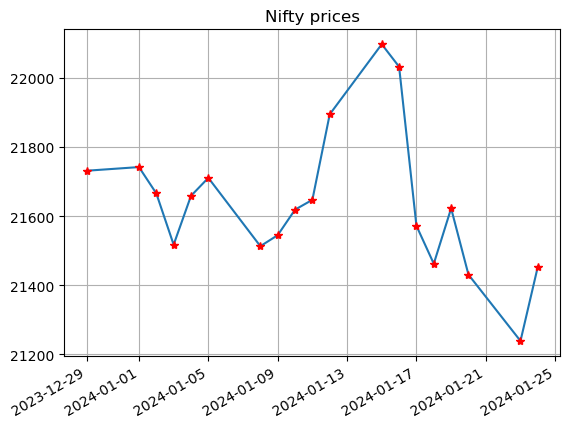

In [62]:
nifty['nifty'].plot(grid=True, marker='*', markevery=1, markerfacecolor='red', markeredgecolor='red')
plt.title('Nifty prices')
plt.show()